In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# The goal of this simulation is to answer the questions, "How long will the COVID-19 pandemic last?" and "How many people are infected right now in my local area but do not know it?"

In [9]:
from pprint import pprint
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import string

import math
from math import log
from math import exp
import random

import numpy as np

# Simple model for pedagogy

In [20]:
home_incubating_to_home_incubating = 1
home_sick_to_home_incubating = 1
home_incubating_to_moving_incubating = 0 
home_sick_to_moving_incubating = 0

home_sick_to_home_dead = 0.04
home_sick_to_home_recovered = 0.96
moving_sick_to_moving_dead = 0.04
moving_sick_to_moving_recovered = 0.96

percent_of_recovered_who_do_not_get_reinfected = 0.998
total_households = 100000

num_days = 200

# Starting March 5
home_sick = [0, 0, 0, 1, 2, 3, 6, 12, 25, 50] + [0]*(num_days)
# big assumption: how many hidden cases corresponded to the visible cases during the same time period:
home_incubating = [1, 2, 3, 5, 10, 30, 60, 125, 250, 500] + [0]*(num_days)
home_dead = [0]*7 + [0]*(num_days)
home_recovered = [0]*7 + [0]*(num_days)


for day in range(9, num_days):

    home_incubating[day+1] = sum(home_incubating[day-9: day])*home_incubating_to_home_incubating
    home_incubating[day+1] += sum(home_sick[day-9: day])*home_sick_to_home_incubating
    
    # people who have been incubating for 2 to 12 days move to being "sick," with or without symptoms
    # FIXME: should we assume a cleanly separated bucket for every asymptomatic incubator becoming a "sick" person?
    # This model currently assumes that everyone who gets infected, eventually after 12 days moves to a bucket called "sick" people
    # Over the 10 day period from day 2 to day 12 of incubation, 1/10 of them convert to this sick bucket each day.
    home_sick_new = 0
    for i in range(2,12):
        if (day+1-i >=0):
            home_sick_new += home_incubating[day+1-i]/10
    home_sick[day+1] = home_sick_new

    
    # people who have been sick die or recover
    if day-11 >= 0:
        home_dead[day+1] = home_sick[day-11]*home_sick_to_home_dead
        home_recovered[day+1] = home_sick[day-11]*home_sick_to_home_recovered

    # we must remove from the population people who are either now recovered or who have died
    home_not_yet_infected = total_households - sum(home_dead) - sum(home_recovered)*percent_of_recovered_who_do_not_get_reinfected - sum(home_sick) - sum(home_incubating)
    if home_not_yet_infected < 0:
        home_not_yet_infected = 0
        
    if home_incubating[day+1] > home_not_yet_infected:
        home_incubating[day+1] = home_not_yet_infected
        
print(int(sum(home_incubating)), '\n')
print(int(sum(home_recovered)), '\n')
print(int(sum(home_dead)), '\n')

56815 

54595 

2274 



# FIXME: This code is not currently working! This code contains both home and moving populations.  But it still needs to be cleaned up to follow the same reasoning as the simple model.  We decided better to post embarrassingly non-wrking code to the community sooner, and have people collaborate than to hold it, even for a few hours, while we cleaned it up. 

In [11]:
home_incubating_to_home_incubating = 0.1 
moving_incubating_to_home_incubating = 0.01 
home_sick_to_home_incubating = 0
moving_sick_to_home_incubating = 0.01 

home_incubating_to_moving_incubating = 0 
moving_incubating_to_moving_incubating = 0.2 
home_sick_to_moving_incubating = 0
moving_sick_to_moving_incubating = 0.05

home_sick_to_home_dead = 0.04
home_sick_to_home_recovered = 0.96
moving_sick_to_moving_dead = 0.04
moving_sick_to_moving_recovered = 0.96

percent_of_recovered_who_do_not_get_reinfected = 0.998
total_households = 100000

total_households = 1e5
percent_of_households_with_person_moving = 0.25
households_moving = total_households*percent_of_households_with_person_moving
households_home = total_households*(1-percent_of_households_with_person_moving)

num_days = 60

# Starting March 5
home_incubating = [1, 2, 3, 5, 10, 30, 60, 125, 250, 500] + [0]*(num_days)
moving_incubating = [1, 2, 3, 5, 10, 30, 60, 125, 250, 500] + [0]*(num_days)
home_sick = [0, 0, 0, 1, 2, 3, 6, 12, 25, 50] + [0]*(num_days)
moving_sick = [0, 0, 0, 1, 2, 3, 6, 12, 25, 50]+ [0]*(num_days)
home_dead = [0]*7 + [0]*(num_days)
moving_dead = [0]*7 + [0]*(num_days)
home_recovered = [0]*7 + [0]*(num_days)
moving_recovered = [0]*7 + [0]*(num_days)


for day in range(9, num_days):

    home_incubating_new = sum(home_incubating[day-9: day])*home_incubating_to_home_incubating
    print(home_incubating_new)
    home_incubating_new += sum(moving_incubating[day-9: day])*moving_incubating_to_home_incubating
    home_incubating_new += sum(home_sick[day-9: day])*home_sick_to_home_incubating
    home_incubating_new += sum(moving_sick[day-9: day])*moving_sick_to_home_incubating
    if home_incubating_new < 0:
        home_incubating_new = 0


    moving_incubating_new = sum(home_incubating[day-9: day])*home_incubating_to_moving_incubating
    moving_incubating_new += sum(moving_incubating[day-9: day])*moving_incubating_to_moving_incubating
    moving_incubating_new += sum(home_sick[day-9: day])*home_sick_to_moving_incubating
    moving_incubating_new += sum(moving_sick[day-9: day])*moving_sick_to_moving_incubating
    if moving_incubating_new < 0:
        home_incubating_new = 0


    home_not_yet_infected = households_home - sum(home_dead) - (sum(home_recovered)*0.998) - sum(home_sick) - sum(home_incubating)
    if home_not_yet_infected < 0:
        home_not_yet_infected = 0

    home_incubating[day+1] = home_incubating_new
    if home_incubating_new > home_not_yet_infected:
        home_incubating[day+1] = home_not_yet_infected

    moving_not_yet_infected = households_moving - sum(moving_dead) - (sum(moving_recovered)*0.998) - sum(moving_sick) - sum(moving_incubating)
    if moving_not_yet_infected < 0:
        moving_not_yet_infected = 0

    moving_incubating[day+1] = moving_incubating_new
    if moving_incubating_new > moving_not_yet_infected:
        moving_incubating[day+1] = moving_not_yet_infected
        
#     print(int(moving_not_yet_infected + home_not_yet_infected))
    
    
    # people who have been incubating for 2 to 12 days get sick
    home_sick_new = 0
    moving_sick_new = 0
    for i in range(2,12):
        if (day+1-i >=0):
            home_sick_new += home_incubating[day+1-i]/10
            moving_sick_new += moving_incubating[day+1-i]/10
    
    home_sick[day+1] = home_sick_new
    moving_sick[day+1] = moving_sick_new
    
#     print(home_sick[day+1])
#     print(moving_sick[day+1], '\n')
    
    # people who have been sick die or recover
    if day-11 >= 0:
        home_dead[day+1] = home_sick[day-11]*home_sick_to_home_dead
        home_recovered[day+1] = home_sick[day-11]*home_sick_to_home_recovered
        
        moving_dead[day+1] = moving_sick[day-11]*moving_sick_to_moving_dead 
        moving_recovered[day+1] = moving_sick[day-11]*moving_sick_to_moving_recovered

#     print(int(sum(moving_incubating) + sum(home_incubating)))

48.6
98.5
103.69500000000001
114.32900000000001
125.42875
137.38944999999998
148.7865
158.76470999999998
163.81796125000002
157.85578175
127.91038875000002
142.45353515000002
148.77891488125005
156.71249010125
164.64712772375003
172.77465130850004
181.0512036859063
189.61914149876878
198.71070861310628
208.96447568573382
221.72554480757083
239.85888759200722
258.8934991464978
279.4582923370249
300.3069316042726
321.36774956177874
342.2769592303652
362.62265237646096
381.89066568199655
399.44332064426334
414.4547570914704
425.804626667318
434.1279516922124
440.7966148624639
445.24224671589354
447.4879614430187
447.6616655295344
445.97759476815776
442.7580554303852
438.45843047161264
433.69783410502953
428.1682357226557
421.60284996878073
414.65846135270425
407.5426328910083
400.3596941793297
393.22164085164405
386.22527912324574
379.4429092042893
372.90822713285877
366.59866059774026


# Plotting functions

number of newly infected people each day


Text(0, 0.5, 'number of households')

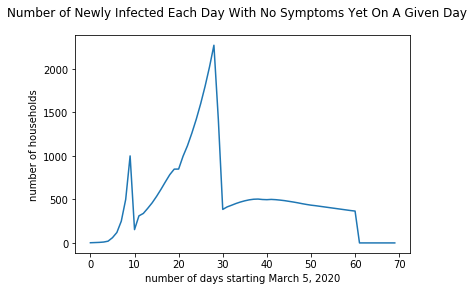

In [12]:
print('number of newly infected people each day')
total_incubating = [0]*len(home_incubating)
for i in range(len(home_incubating)):
    total_incubating [i] = int(home_incubating[i] + moving_incubating[i])
# pprint(total_incubating)
# print('\n')

x = list(range(len(total_incubating)))

fig = plt.figure()
plt.plot(x, total_incubating)
# plt.plot(x, home_incubating, moving_incubating)
fig.suptitle('Number of Newly Infected Each Day With No Symptoms Yet On A Given Day')
plt.xlabel('number of days starting March 5, 2020')
plt.ylabel('number of households')


Text(0, 0.5, 'number of households')

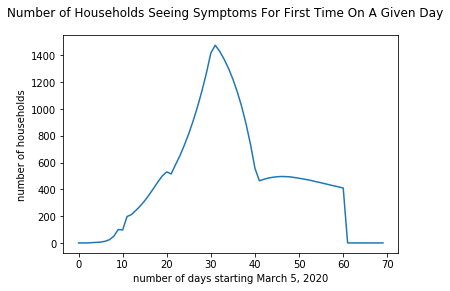

In [13]:
# print('number of newly symptomatic people each day')
total_sick = [0]*len(home_sick)
for i in range(len(home_sick)):
    total_sick[i] = int(home_sick[i] + moving_sick[i])
# pprint(total_sick)
# print('\n')

x = list(range(len(total_sick)))

fig = plt.figure()
plt.plot(x, total_sick)
fig.suptitle('Number of Households Seeing Symptoms For First Time On A Given Day')
plt.xlabel('number of days starting March 5, 2020')
plt.ylabel('number of households')

Text(0, 0.5, 'number of households')

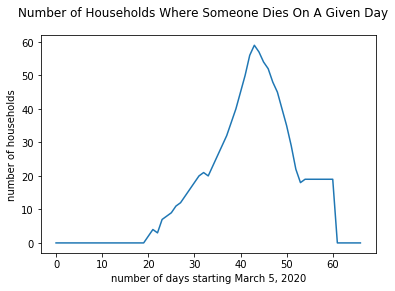

In [14]:
# print('number of newly dead people each day')
total_dead = [0]*len(home_dead)
for i in range(len(home_dead)):
    total_dead[i] = int(home_dead[i] + moving_dead[i])
# pprint(total_dead)
# print('\n')

x = list(range(len(total_dead)))

fig = plt.figure()
plt.plot(x, total_dead)
fig.suptitle('Number of Households Where Someone Dies On A Given Day')
plt.xlabel('number of days starting March 5, 2020')
plt.ylabel('number of households')

In [15]:
tmp = [100]
for i in range(1,11):
    tmp.append(int(tmp[i-1]*1.4165))
print(tmp)

for i in range(0,11):
    tmp[i] = tmp[i]/10
print(tmp)
sum(tmp[1:11])

[100, 141, 199, 281, 398, 563, 797, 1128, 1597, 2262, 3204]
[10.0, 14.1, 19.9, 28.1, 39.8, 56.3, 79.7, 112.8, 159.7, 226.2, 320.4]


1057.0